# Gas powerplant 
- In this notebook we focus on the result simulation of different strategies. 

- Heuristic ones and also the optimal one. 

In [1]:
import sys
import os

sys.path.append("/Users/filiprolenec/Desktop/MT/MTpython/src")

In [2]:
from gas_example.enum_types import MothballedState, PowerplantState
from gas_example.simulation.simulation import run_simulation

In [3]:
from  gas_example.simulation.state import State, update_balance
import gas_example.simulation.strategy as s
import matplotlib.pyplot as plt
import time
from progressbar import progressbar

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()
from gas_example.simulation.strategy import OptimalStrategy

# Baseline strategies  
- Build one stage and run all the time
- Build one stage and run only when it is profitable
- Build one stage, run when it is profitable and mothball with a hysteresis effect

In [14]:
initial_state = State(24,9,39,PowerplantState.NOT_BUILT,0)
epoch = 0 

In [15]:
strategy_0 = s.HeuristicStrategy(s.heuristic_strategy_function_0)
strategy_1 = s.HeuristicStrategy(s.heuristic_strategy_function_1)

opt_strategy = OptimalStrategy("saved_vfs/vfs_12_20_2020.pkl")


In [16]:
strategies = [strategy_0, strategy_1, opt_strategy]

In [ ]:
import time
import sys

results_final = {}
for i in range(len(strategies)):
    results = []
    for j in progressbar(range(100)):
        results.append(run_simulation(strategies[i], initial_state))
    results_final[i]= results

100% (100 of 100) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (100 of 100) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
 23% (23 of 100) |#####                  | Elapsed Time: 0:02:41 ETA:   0:12:59

In [9]:
flatten = lambda t: [item for sublist in t.values() for item in sublist]
all_results = flatten(results_final)
max_value_displayed = np.percentile(all_results, 98)
min_value_displayed = np.percentile(all_results, 2)


In [10]:
total_min = min([min(results_final[i]) for i in range(len(results_final))])
total_min = min_value_displayed
total_max = max_value_displayed

width = (total_max-total_min)/30
b = [total_min +i*width for i in range(30)]

In [11]:
df = pd.DataFrame(results_final)
means = [np.mean(df[i]) for i in range(len(results_final))]
colors = sns.color_palette()[0:4]

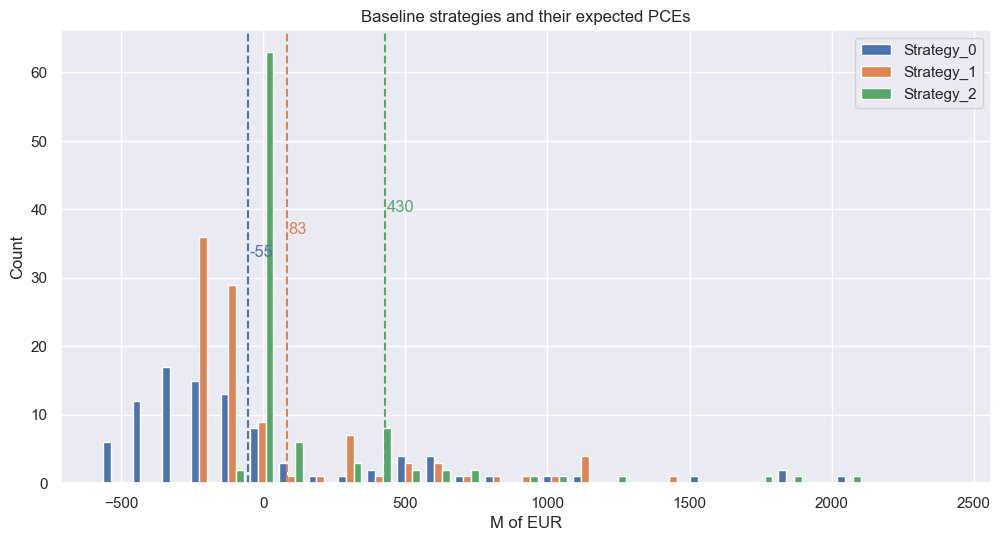

In [12]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 100)

plt.hist(df, bins = b, label = [f"Strategy_{i}" for i in df.columns])

trans = ax.get_xaxis_transform()


for i,mean in enumerate(means):
    plt.axvline(x=mean,linestyle = "dashed", color = colors[i])
    plt.text(mean+5, 0.5+i*0.05, round(mean),transform = trans,  color = colors[i])
plt.xlabel("M of EUR")
plt.ylabel("Count")
plt.legend()
plt.title("Baseline strategies and their expected PCEs")
plt.show()

## Go in detail
- The problem now is that when optimizing V(s_t) we take (s_t,exp(utility)) and make the linear model. But for that we use for the computation of s_t's exp(utility) the optimal action, determined by the zero vf's. 
- Like this the action of not doing anything will always be the optimal action and the model will not evaluate V(s_t) correctly. 

- I need to return to literature and see, how V(s_t) is optimized. 

- I have an idea that we could set up the initial values not 0 but super extreme, so that the optimal actions will dissapear with the realization. 
- Second idea is to randomize the actions. 

# 20.12.
- I did run the optimal strategy and it made more money, no surprise there, but happy anyway. 
- Further analysis can be done on this. 
- This result shows that is is possible to interpret the investment problem. 
